In [ ]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization import perc, SetPlotRC, ApplyFont

In [3]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

In [1]:
# global_color_vector = ["b", "g", "r", "c", "m", "y"]
global_color_vector = ["blue", "red", "green", "orange", "m", "y"]

# MNIST Results

In [30]:
# df_results_corinfo_mnist = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_MNIST_muForward_Ablation_V1_Copy.pkl")
# df_results_corinfo_mnist["muForward_multiplier"] = df_results_corinfo_mnist.apply(lambda row: row["Hyperparams"]["muForward_multiplier"], axis = 1)
# df_results_corinfo_mnist = df_results_corinfo_mnist.loc[df_results_corinfo_mnist["muForward_multiplier"] < 1.5]
# df_results_corinfo_mnist.to_pickle("../Results/simulation_results_CorInfoMax_MNIST_muForward_Ablation_V1.pkl")



In [31]:
df_results_corinfo_mnist = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_MNIST_muForward_Ablation_V1.pkl")
df_results_corinfo_mnist['Trn_ACC'] = df_results_corinfo_mnist.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_corinfo_mnist['Tst_ACC'] = df_results_corinfo_mnist.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results_corinfo_mnist["muForward_multiplier"] = df_results_corinfo_mnist.apply(lambda row: row["Hyperparams"]["muForward_multiplier"], axis = 1)
df_setting_corinfo_mnist = df_results_corinfo_mnist[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_corinfo_mnist = df_setting_corinfo_mnist.iloc[df_setting_corinfo_mnist['Trn_ACC'].argmax()]['setting_number']
print(best_setting_corinfo_mnist) #= 1

print(df_results_corinfo_mnist.shape)

5.0
(15, 10)


In [32]:
df_setting = df_results_corinfo_mnist[['muForward_multiplier', 'Trn_ACC', 'Tst_ACC']].groupby('muForward_multiplier').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results_corinfo_mnist[['muForward_multiplier', 'Trn_ACC', 'Tst_ACC']].groupby('muForward_multiplier').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,muForward_multiplier,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,0.10,0.930883,0.928500,0.020436,0.017708
1,0.25,0.967467,0.962867,0.000236,0.001528
2,0.50,0.980228,0.971267,0.000442,0.000306
3,0.75,0.986050,0.974833,0.000575,0.000379
4,1.00,0.989539,0.976333,0.000084,0.000751


In [33]:
trn_acc_list = []
tst_acc_list = []
trn_std_list = []
tst_std_list = []

for mu_forward_value in df_results_corinfo_mnist["muForward_multiplier"].unique():
    trn_acc_list.append(np.stack(df_results_corinfo_mnist.loc[df_results_corinfo_mnist["muForward_multiplier"] == mu_forward_value]['Trn_ACC_list'].values, 1).mean(1))
    tst_acc_list.append(np.stack(df_results_corinfo_mnist.loc[df_results_corinfo_mnist["muForward_multiplier"] == mu_forward_value]['Tst_ACC_list'].values, 1).mean(1))
    trn_std_list.append(np.stack(df_results_corinfo_mnist.loc[df_results_corinfo_mnist["muForward_multiplier"] == mu_forward_value]['Trn_ACC_list'].values, 1).std(1))
    tst_std_list.append(np.stack(df_results_corinfo_mnist.loc[df_results_corinfo_mnist["muForward_multiplier"] == mu_forward_value]['Tst_ACC_list'].values, 1).std(1))

df_setting['Trn_ACC_list'] = trn_acc_list
df_setting['Tst_ACC_list'] = tst_acc_list
df_setting['Trn_STD_list'] = trn_std_list
df_setting['Tst_STD_list'] = tst_std_list

In [34]:
df_setting

,muForward_multiplier,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std,Trn_ACC_list,Tst_ACC_list,Trn_STD_list,Tst_STD_list
0,0.10,0.930883,0.928500,0.020436,0.017708,"[0.8828722222222222, 0.9059555555555555, 0.917...","[0.8898666666666667, 0.9122333333333333, 0.921...","[0.002174785359069846, 0.0005724109721062618, ...","[0.002989239962859379, 0.0014383632673594497, ..."
1,0.25,0.967467,0.962867,0.000236,0.001528,"[0.9097444444444444, 0.9295833333333333, 0.940...","[0.9137666666666666, 0.9315000000000001, 0.940...","[0.0008345916425872891, 0.0004957224432490089,...","[0.0024944382578492965, 0.001651262143533451, ..."
2,0.50,0.980228,0.971267,0.000442,0.000306,"[0.926188888888889, 0.9464388888888889, 0.9567...","[0.9277000000000001, 0.9456333333333333, 0.953...","[0.0017049130168608896, 0.0008659541230399288,...","[0.0022861904265976075, 0.0008956685895029483,..."
3,0.75,0.986050,0.974833,0.000575,0.000379,"[0.9341555555555555, 0.9551166666666666, 0.964...","[0.9337666666666666, 0.9521666666666667, 0.959...","[0.002126827464024389, 0.00035459940882741196,...","[0.0025772509040103515, 0.0010208928554075616,..."
4,1.00,0.989539,0.976333,0.000084,0.000751,"[0.9398666666666666, 0.9600166666666667, 0.967...","[0.9386, 0.9568, 0.9626666666666667, 0.9674999...","[0.0011848581724784226, 0.0018308063392537739,...","[0.0015895492023421606, 0.002426245384677018, ..."


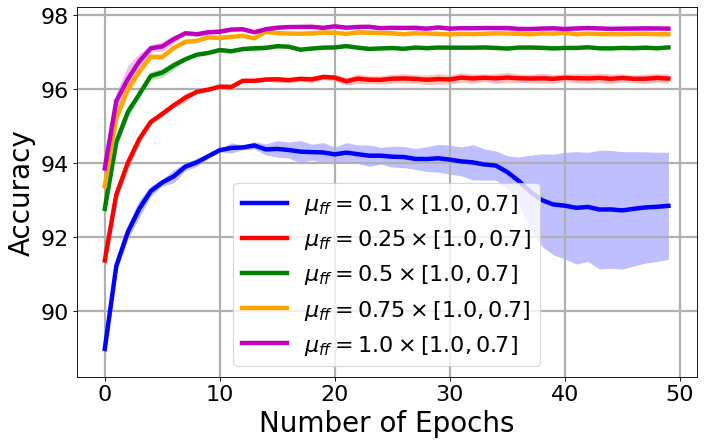

In [36]:
fh2=plt.figure(figsize=(10, 6), dpi=80)
for ii in range(df_setting.shape[0]):
    data = df_setting.iloc[ii]['Tst_ACC_list']*100
    std_data = df_setting.iloc[ii]['Tst_STD_list']*100
    x = np.arange(0, data.shape[0])
    plt.plot(x, data, linewidth=4, color = global_color_vector[ii], label = r"$\mu_{ff} = " + str(df_setting.iloc[ii]["muForward_multiplier"]) + r" \times" + " [{}, {}]$".format(1.0, 0.7))
    plt.fill_between(x, data + std_data, data - std_data, alpha=0.25, linewidth=0, color = global_color_vector[ii])
    SetPlotRC()
    gh=plt.grid(linewidth=2)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel('Accuracy',fontsize=25)
    plt.xlabel(r"Number of Epochs",fontsize=25)
    plt.legend(fontsize = 20, loc = "best")

In [38]:
# df_results_corinfo_mnist = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_MNIST_neural_lr_start_Ablation_V1_Copy.pkl")
# df_results_corinfo_mnist.to_pickle("../Results/simulation_results_CorInfoMax_MNIST_neural_lr_start_Ablation_V1.pkl")


In [39]:
df_results_corinfo_mnist = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_MNIST_neural_lr_start_Ablation_V1.pkl")
df_results_corinfo_mnist['Trn_ACC'] = df_results_corinfo_mnist.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_corinfo_mnist['Tst_ACC'] = df_results_corinfo_mnist.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results_corinfo_mnist["neural_lr_start"] = df_results_corinfo_mnist.apply(lambda row: row["Hyperparams"]["neural_lr"], axis = 1)
df_setting_corinfo_mnist = df_results_corinfo_mnist[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_corinfo_mnist = df_setting_corinfo_mnist.iloc[df_setting_corinfo_mnist['Trn_ACC'].argmax()]['setting_number']
print(best_setting_corinfo_mnist) #= 1

print(df_results_corinfo_mnist.shape)

3.0
(18, 10)


In [40]:
df_setting = df_results_corinfo_mnist[['neural_lr_start', 'Trn_ACC', 'Tst_ACC']].groupby('neural_lr_start').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results_corinfo_mnist[['neural_lr_start', 'Trn_ACC', 'Tst_ACC']].groupby('neural_lr_start').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,neural_lr_start,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,0.015,0.103606,0.105867,0.007588,0.006710
1,0.050,0.989061,0.974533,0.000469,0.000723
2,0.075,0.987994,0.974333,0.000587,0.000764
3,0.100,0.750422,0.741767,0.410256,0.401807
4,0.150,0.107817,0.108333,0.007881,0.008949
5,0.300,0.107817,0.108333,0.007881,0.008949


In [41]:
trn_acc_list = []
tst_acc_list = []
trn_std_list = []
tst_std_list = []

for neural_lr_start in np.sort(df_results_corinfo_mnist["neural_lr_start"].unique()):
    trn_acc_list.append(np.stack(df_results_corinfo_mnist.loc[df_results_corinfo_mnist["neural_lr_start"] == neural_lr_start]['Trn_ACC_list'].values, 1).mean(1))
    tst_acc_list.append(np.stack(df_results_corinfo_mnist.loc[df_results_corinfo_mnist["neural_lr_start"] == neural_lr_start]['Tst_ACC_list'].values, 1).mean(1))
    trn_std_list.append(np.stack(df_results_corinfo_mnist.loc[df_results_corinfo_mnist["neural_lr_start"] == neural_lr_start]['Trn_ACC_list'].values, 1).std(1))
    tst_std_list.append(np.stack(df_results_corinfo_mnist.loc[df_results_corinfo_mnist["neural_lr_start"] == neural_lr_start]['Tst_ACC_list'].values, 1).std(1))

df_setting['Trn_ACC_list'] = trn_acc_list
df_setting['Tst_ACC_list'] = tst_acc_list
df_setting['Trn_STD_list'] = trn_std_list
df_setting['Tst_STD_list'] = tst_std_list
df_setting

,neural_lr_start,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std,Trn_ACC_list,Tst_ACC_list,Trn_STD_list,Tst_STD_list
0,0.015,0.103606,0.105867,0.007588,0.006710,"[0.3630777777777778, 0.377, 0.3576999999999999...","[0.365, 0.3780666666666666, 0.3595666666666666...","[0.37346433870444795, 0.38394049958583715, 0.3...","[0.37695959995734296, 0.38516590653321786, 0.3..."
1,0.050,0.989061,0.974533,0.000469,0.000723,"[0.9398666666666666, 0.9601722222222221, 0.968...","[0.9386, 0.9571666666666667, 0.963066666666666...","[0.0011848581724784226, 0.001965175203447978, ...","[0.0015895492023421606, 0.0027535835237417726,..."
2,0.075,0.987994,0.974333,0.000587,0.000764,"[0.9394444444444444, 0.9615, 0.969794444444444...","[0.9370333333333334, 0.959, 0.9641333333333334...","[0.0029974165831327835, 0.0011684113938100424,...","[0.0035975300168618984, 0.0012961481396815664,..."
3,0.100,0.750422,0.741767,0.410256,0.401807,"[0.9412055555555555, 0.9615444444444444, 0.969...","[0.9401999999999999, 0.9584999999999999, 0.964...","[0.0009438233251704475, 0.0022440181113241, 0....","[0.0012569805089976535, 0.0026089589239132694,..."
4,0.150,0.107817,0.108333,0.007881,0.008949,"[0.2951888888888889, 0.13506666666666667, 0.13...","[0.2943333333333334, 0.13516666666666668, 0.13...","[0.20627534023158056, 0.05225748750179251, 0.0...","[0.20448734815522346, 0.052986434322590745, 0...."
5,0.300,0.107817,0.108333,0.007881,0.008949,"[0.10781666666666667, 0.10781666666666667, 0.1...","[0.10833333333333334, 0.10833333333333334, 0.1...","[0.006434671708797587, 0.006434671708797587, 0...","[0.007306770072260991, 0.007306770072260991, 0..."


In [42]:
# fh2=plt.subplots(figsize=(10, 6), dpi=80)
# for ii in range(1, df_setting.shape[0]-1):
#     data = df_setting.iloc[ii]['Tst_ACC_list']*100
#     std_data = df_setting.iloc[ii]['Tst_STD_list']*100
#     x = np.arange(1, data.shape[0]+1)
#     plt.plot(x, data, linewidth=4, label = r"$\mu_{\mathbf{u}}[0]$ = " + str(df_setting.iloc[ii]["neural_lr_start"]))
#     plt.fill_between(x, data + std_data, data - std_data, alpha=0.25, linewidth=0)
# SetPlotRC()
# gh=plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('Accuracy',fontsize=25)
# plt.xlabel(r"Number of Epochs",fontsize=25)
# plt.legend(fontsize = 20, loc = "best")

In [43]:
# from matplotlib.patches import Rectangle
# fh2=plt.subplots(figsize=(10, 6), dpi=80)
# for ii in range( df_setting.shape[0]):
#     data = df_setting.iloc[ii]['Tst_ACC_list']*100
#     std_data = df_setting.iloc[ii]['Tst_STD_list']*100
#     x = np.arange(1, data.shape[0]+1)
#     plt.plot(x, data, linewidth=4, color = global_color_vector[ii], label = r"$\mu_{\mathbf{u}}[0]$ = " + str(df_setting.iloc[ii]["neural_lr_start"]))
#     plt.fill_between(x, data + std_data, data - std_data, alpha=0.25, linewidth=0, color = global_color_vector[ii])
# SetPlotRC()
# gh=plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('Accuracy',fontsize=25)
# plt.xlabel(r"Number of Epochs",fontsize=25)
# plt.legend(fontsize = 20, loc = "best")
  
# someX, someY = 30, 90
# currentAxis = plt.gca()
# currentAxis.add_patch(Rectangle((someX, someY), 22, 13, facecolor="grey", alpha = .5))
# plt.arrow(52, 95, 15, -0.005, width = 0.5, length_includes_head=True,
#           head_width=8, head_length=2)

# sub_axes = plt.axes([1.0, 0.6, .3, .3])
# for ii in range(1, df_setting.shape[0]-2):
#     data = df_setting.iloc[ii]['Tst_ACC_list'][30:]*100
#     std_data = df_setting.iloc[ii]['Tst_STD_list'][30:]*100
#     x = np.arange(31, data.shape[0]+31)
#     # location for the zoomed portion  

#     # plot the zoomed portion
#     sub_axes.plot(x, data, color = global_color_vector[ii], label = r"$\mu_{\mathbf{u}}[0]$ = " + str(df_setting.iloc[ii]["neural_lr_start"])) 
#     sub_axes.fill_between(x, data + std_data, data - std_data, alpha=0.25, linewidth=0, color = global_color_vector[ii])


# plt.ylabel('Accuracy',fontsize=15)
# plt.xlabel(r"Number of Epochs",fontsize=15)
# SetPlotRC()
# gh=plt.grid(linewidth=2)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)


# # plt.draw()
# # plt.show()
# # fh2=plt.figure(figsize=(10, 6), dpi=80)
# # for ii in range(1, df_setting.shape[0]-1):
# #     data = df_setting.iloc[ii]['Tst_ACC_list'][30:]*100
# #     std_data = df_setting.iloc[ii]['Tst_STD_list'][30:]*100
# #     x = np.arange(30, data.shape[0]+30)
# #     plt.plot(x, data, linewidth=4, label = r"$\mu_{\mathbf{u}}[0]$ = " + str(df_setting.iloc[ii]["neural_lr_start"]))
# #     plt.fill_between(x, data + std_data, data - std_data, alpha=0.25, linewidth=0)
# #     SetPlotRC()
# #     gh=plt.grid(linewidth=2)
# #     plt.xticks(fontsize=20)
# #     plt.yticks(fontsize=20)
# #     plt.ylabel('Accuracy',fontsize=25)
# #     plt.xlabel(r"Number of Epochs",fontsize=25)
# #     plt.legend(fontsize = 20, loc = "best")

(array([97.3 , 97.35, 97.4 , 97.45, 97.5 , 97.55, 97.6 ]),
 [Text(0, 97.30000000000001, '97.30'),
  Text(0, 97.35000000000001, '97.35'),
  Text(0, 97.4, '97.40'),
  Text(0, 97.45000000000002, '97.45'),
  Text(0, 97.50000000000001, '97.50'),
  Text(0, 97.55000000000001, '97.55'),
  Text(0, 97.60000000000001, '97.60')])

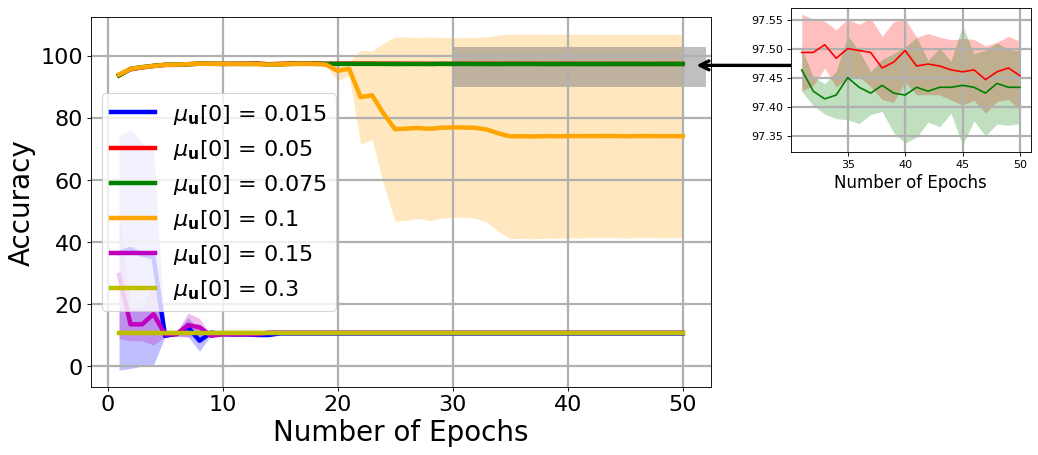

In [44]:
from matplotlib.patches import Rectangle
fh2=plt.subplots(figsize=(10, 6), dpi=80)
for ii in range( df_setting.shape[0]):
    data = df_setting.iloc[ii]['Tst_ACC_list']*100
    std_data = df_setting.iloc[ii]['Tst_STD_list']*100
    x = np.arange(1, data.shape[0]+1)
    plt.plot(x, data, linewidth=4, color = global_color_vector[ii], label = r"$\mu_{\mathbf{u}}[0]$ = " + str(df_setting.iloc[ii]["neural_lr_start"]))
    plt.fill_between(x, data + std_data, data - std_data, alpha=0.25, linewidth=0, color = global_color_vector[ii])
SetPlotRC()
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.legend(fontsize = 20, loc = "best")
  
someX, someY = 30, 90
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((someX, someY), 22, 13, facecolor="grey", alpha = .5))

# Add an arrow pointing to the zoomed-in region
plt.annotate('Zoomed In', xy=(51, 97), xytext=(65, 95), arrowprops=dict(facecolor='black', lw=3, arrowstyle='->'), fontsize=20)
sub_axes = plt.axes([1.0, 0.6, .3, .3])
for ii in range(1, df_setting.shape[0]-3):
    data = df_setting.iloc[ii]['Tst_ACC_list'][30:]*100
    std_data = df_setting.iloc[ii]['Tst_STD_list'][30:]*100
    x = np.arange(31, data.shape[0]+31)
    # location for the zoomed portion  

    # plot the zoomed portion
    sub_axes.plot(x, data, color = global_color_vector[ii], label = r"$\mu_{\mathbf{u}}[0]$ = " + str(df_setting.iloc[ii]["neural_lr_start"])) 
    sub_axes.fill_between(x, data + std_data, data - std_data, alpha=0.25, linewidth=0, color = global_color_vector[ii])


# plt.ylabel('Accuracy',fontsize=15)
plt.xlabel(r"Number of Epochs",fontsize=15)
SetPlotRC()
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


In [45]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.patches import Rectangle

# # Create a figure with two subplots
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), dpi=80)

# # Original plot
# for ii in range(df_setting.shape[0] - 1):
#     data = df_setting.iloc[ii]['Tst_ACC_list'] * 100
#     std_data = df_setting.iloc[ii]['Tst_STD_list'] * 100
#     x = np.arange(1, data.shape[0] + 1)
#     ax1.plot(x, data, color = global_color_vector[ii], linewidth=4, label=r"$\mu_{\mathbf{u}}[0]$ = " + str(df_setting.iloc[ii]["neural_lr_start"]))
#     ax1.fill_between(x, data + std_data, data - std_data, alpha=0.25, linewidth=0, color = global_color_vector[ii])

# # Add a box on the original plot to indicate the zoomed-in region
# rect1 = Rectangle((30, 95), 20, 7, linewidth=2, edgecolor='r', facecolor='none')
# ax1.add_patch(rect1)

# # Add an arrow pointing to the zoomed-in region
# ax1.annotate('Zoomed In', xy=(52, 97), xytext=(65, 95), arrowprops=dict(facecolor='black', lw=3, arrowstyle='->'), fontsize=20)

# # Set plot properties for the original plot
# ax1.grid(linewidth=2)
# ax1.tick_params(labelsize=20)
# ax1.set_ylabel('Accuracy', fontsize=25)
# ax1.set_xlabel(r"Number of Epochs", fontsize=25)
# ax1.legend(fontsize=20, loc="best")

# for ii in range(1, df_setting.shape[0] - 2):
#     data = df_setting.iloc[ii]['Tst_ACC_list'] * 100
#     std_data = df_setting.iloc[ii]['Tst_STD_list'] * 100
#     x = np.arange(1, data.shape[0] + 1)
#     # Zoomed-in plot
#     zoomed_data = data[29:] * 100  # Zoomed-in x-axis range
#     zoomed_std_data = std_data[29:] * 100
#     zoomed_x = x[29:]

#     # Plot the zoomed-in region on the second axis
#     ax2.plot(zoomed_x, zoomed_data, linewidth=4, color = global_color_vector[ii])
#     ax2.fill_between(zoomed_x, zoomed_data + zoomed_std_data, zoomed_data - zoomed_std_data, alpha=0.25, linewidth=0, color = global_color_vector[ii])

#     # Set plot properties for the zoomed-in plot
#     ax2.grid(linewidth=2)
#     ax2.tick_params(labelsize=20)
#     ax2.set_ylabel('Accuracy', fontsize=25)
#     ax2.set_xlabel(r"Number of Epochs", fontsize=25)

#     # Adjust layout to prevent overlap
# plt.tight_layout()

#     # Show the plot
# plt.show()


# CIFAR10 Results

In [47]:
# df_results_corinfo_cifar = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_CIFAR10_muForward_Ablation_V1_Copy.pkl")
# df_results_corinfo_cifar["muForward_multiplier"] = df_results_corinfo_cifar.apply(lambda row: row["Hyperparams"]["muForward_multiplier"], axis = 1)
# df_results_corinfo_cifar = df_results_corinfo_cifar = df_results_corinfo_cifar.loc[df_results_corinfo_cifar["muForward_multiplier"]< 1.5]

# df_results_corinfo_cifar.to_pickle("../Results/simulation_results_CorInfoMax_CIFAR10_muForward_Ablation_V1.pkl")


In [48]:
df_results_corinfo_cifar = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_CIFAR10_muForward_Ablation_V1.pkl")
df_results_corinfo_cifar['Trn_ACC'] = df_results_corinfo_cifar.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_corinfo_cifar['Tst_ACC'] = df_results_corinfo_cifar.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results_corinfo_cifar["muForward_multiplier"] = df_results_corinfo_cifar.apply(lambda row: row["Hyperparams"]["muForward_multiplier"], axis = 1)
df_setting_corinfo_cifar = df_results_corinfo_cifar[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_corinfo_cifar = df_setting_corinfo_cifar.iloc[df_setting_corinfo_cifar['Trn_ACC'].argmax()]['setting_number']
print(best_setting_corinfo_cifar) #= 1

print(df_results_corinfo_cifar.shape)

5.0
(15, 10)


In [49]:
df_setting = df_results_corinfo_cifar[['muForward_multiplier', 'Trn_ACC', 'Tst_ACC']].groupby('muForward_multiplier').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results_corinfo_cifar[['muForward_multiplier', 'Trn_ACC', 'Tst_ACC']].groupby('muForward_multiplier').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,muForward_multiplier,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,0.10,0.397673,0.390133,0.001324,0.001124
1,0.25,0.479260,0.452967,0.005714,0.001644
2,0.50,0.556447,0.494300,0.002953,0.000954
3,0.75,0.608433,0.509133,0.001904,0.002301
4,1.00,0.649140,0.518733,0.001124,0.002259


In [50]:
trn_acc_list = []
tst_acc_list = []
trn_std_list = []
tst_std_list = []

for mu_forward_value in df_results_corinfo_cifar["muForward_multiplier"].unique():
    trn_acc_list.append(np.stack(df_results_corinfo_cifar.loc[df_results_corinfo_cifar["muForward_multiplier"] == mu_forward_value]['Trn_ACC_list'].values, 1).mean(1))
    tst_acc_list.append(np.stack(df_results_corinfo_cifar.loc[df_results_corinfo_cifar["muForward_multiplier"] == mu_forward_value]['Tst_ACC_list'].values, 1).mean(1))
    trn_std_list.append(np.stack(df_results_corinfo_cifar.loc[df_results_corinfo_cifar["muForward_multiplier"] == mu_forward_value]['Trn_ACC_list'].values, 1).std(1))
    tst_std_list.append(np.stack(df_results_corinfo_cifar.loc[df_results_corinfo_cifar["muForward_multiplier"] == mu_forward_value]['Tst_ACC_list'].values, 1).std(1))

df_setting['Trn_ACC_list'] = trn_acc_list
df_setting['Tst_ACC_list'] = tst_acc_list
df_setting['Trn_STD_list'] = trn_std_list
df_setting['Tst_STD_list'] = tst_std_list

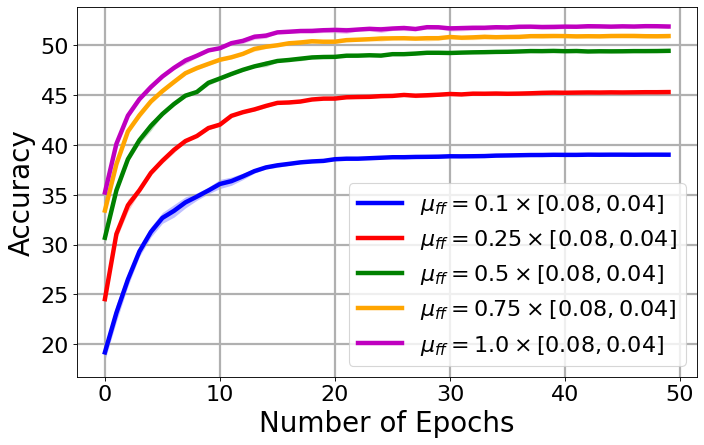

In [51]:
fh2=plt.figure(figsize=(10, 6), dpi=80)
for ii in range(df_setting.shape[0]):
    data = df_setting.iloc[ii]['Tst_ACC_list']*100
    std_data = df_setting.iloc[ii]['Tst_STD_list']*100
    x = np.arange(0, data.shape[0])
    plt.plot(x, data, color = global_color_vector[ii], linewidth=4, label = r"$\mu_{ff} = " + str(df_setting.iloc[ii]["muForward_multiplier"]) + r" \times" + " [{}, {}]$".format(0.08, 0.04))
    plt.fill_between(x, data + std_data, data - std_data, alpha=0.25, linewidth=0, color = global_color_vector[ii])
    SetPlotRC()
    gh=plt.grid(linewidth=2)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel('Accuracy',fontsize=25)
    plt.xlabel(r"Number of Epochs",fontsize=25)
    plt.legend(fontsize = 20, loc = "best")

In [52]:
# df_results_corinfo_cifar = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_CIFAR10_neural_lr_start_Ablation_V1_Copy.pkl")
# df_results_corinfo_cifar.to_pickle("../Results/simulation_results_CorInfoMax_CIFAR10_neural_lr_start_Ablation_V1.pkl")

In [53]:
df_results_corinfo_cifar = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_CIFAR10_neural_lr_start_Ablation_V1.pkl")
df_results_corinfo_cifar['Trn_ACC'] = df_results_corinfo_cifar.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_corinfo_cifar['Tst_ACC'] = df_results_corinfo_cifar.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results_corinfo_cifar["neural_lr_start"] = df_results_corinfo_cifar.apply(lambda row: row["Hyperparams"]["neural_lr"], axis = 1)
df_setting_corinfo_cifar = df_results_corinfo_cifar[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_corinfo_mnist = df_setting_corinfo_cifar.iloc[df_setting_corinfo_cifar['Trn_ACC'].argmax()]['setting_number']
print(best_setting_corinfo_mnist) #= 1

print(df_results_corinfo_cifar.shape)

5.0
(18, 10)


In [54]:
df_setting = df_results_corinfo_cifar[['neural_lr_start', 'Trn_ACC', 'Tst_ACC']].groupby('neural_lr_start').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results_corinfo_cifar[['neural_lr_start', 'Trn_ACC', 'Tst_ACC']].groupby('neural_lr_start').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,neural_lr_start,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,0.015,0.548333,0.492833,0.004602,0.002444
1,0.050,0.649140,0.518733,0.001124,0.002259
2,0.075,0.655787,0.519967,0.002340,0.000231
3,0.100,0.656833,0.519967,0.001420,0.002201
4,0.150,0.087507,0.087167,0.015063,0.014145
5,0.300,0.118627,0.118100,0.016180,0.015969


In [55]:
trn_acc_list = []
tst_acc_list = []
trn_std_list = []
tst_std_list = []

for neural_lr_start in np.sort(df_results_corinfo_cifar["neural_lr_start"].unique()):
    trn_acc_list.append(np.stack(df_results_corinfo_cifar.loc[df_results_corinfo_cifar["neural_lr_start"] == neural_lr_start]['Trn_ACC_list'].values, 1).mean(1))
    tst_acc_list.append(np.stack(df_results_corinfo_cifar.loc[df_results_corinfo_cifar["neural_lr_start"] == neural_lr_start]['Tst_ACC_list'].values, 1).mean(1))
    trn_std_list.append(np.stack(df_results_corinfo_cifar.loc[df_results_corinfo_cifar["neural_lr_start"] == neural_lr_start]['Trn_ACC_list'].values, 1).std(1))
    tst_std_list.append(np.stack(df_results_corinfo_cifar.loc[df_results_corinfo_cifar["neural_lr_start"] == neural_lr_start]['Tst_ACC_list'].values, 1).std(1))

df_setting['Trn_ACC_list'] = trn_acc_list
df_setting['Tst_ACC_list'] = tst_acc_list
df_setting['Trn_STD_list'] = trn_std_list
df_setting['Tst_STD_list'] = tst_std_list
df_setting

,neural_lr_start,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std,Trn_ACC_list,Tst_ACC_list,Trn_STD_list,Tst_STD_list
0,0.015,0.548333,0.492833,0.004602,0.002444,"[0.32432666666666665, 0.37135333333333337, 0.4...","[0.3234666666666667, 0.36800000000000005, 0.39...","[0.0022161427952388023, 0.002423349380964738, ...","[0.00489988662000346, 0.004917316341257703, 0...."
1,0.050,0.649140,0.518733,0.001124,0.002259,"[0.35568, 0.4091133333333334, 0.44165333333333...","[0.3522, 0.40103333333333335, 0.4293, 0.4458, ...","[0.0031109269786780045, 0.0016351418558916877,...","[0.0021354156504062765, 0.0035046001515468515,..."
2,0.075,0.655787,0.519967,0.002340,0.000231,"[0.35628, 0.41015333333333337, 0.4428933333333...","[0.35223333333333334, 0.4018, 0.4292, 0.447433...","[0.0033223285007155366, 0.0014525686061441355,...","[0.001519502842672213, 0.0029810512687081883, ..."
3,0.100,0.656833,0.519967,0.001420,0.002201,"[0.3565533333333333, 0.41041999999999995, 0.44...","[0.35313333333333335, 0.40136666666666665, 0.4...","[0.003490189424977152, 0.0016866534913846478, ...","[0.0009104333522498381, 0.0034451253807211276,..."
4,0.150,0.087507,0.087167,0.015063,0.014145,"[0.09798, 0.11643333333333333, 0.1138533333333...","[0.09816666666666667, 0.1179, 0.1144, 0.097266...","[0.01228665400614287, 0.014275399196597698, 0....","[0.015526822669890394, 0.015402813595790432, 0..."
5,0.300,0.118627,0.118100,0.016180,0.015969,"[0.11138666666666668, 0.09908666666666667, 0.1...","[0.11270000000000001, 0.09960000000000001, 0.1...","[0.026231280732912924, 0.019355594080839325, 0...","[0.027338739302803755, 0.020700402572574928, 0..."


(array([48., 49., 50., 51., 52., 53.]),
 [Text(0, 48.0, '48'),
  Text(0, 49.0, '49'),
  Text(0, 50.0, '50'),
  Text(0, 51.0, '51'),
  Text(0, 52.0, '52'),
  Text(0, 53.0, '53')])

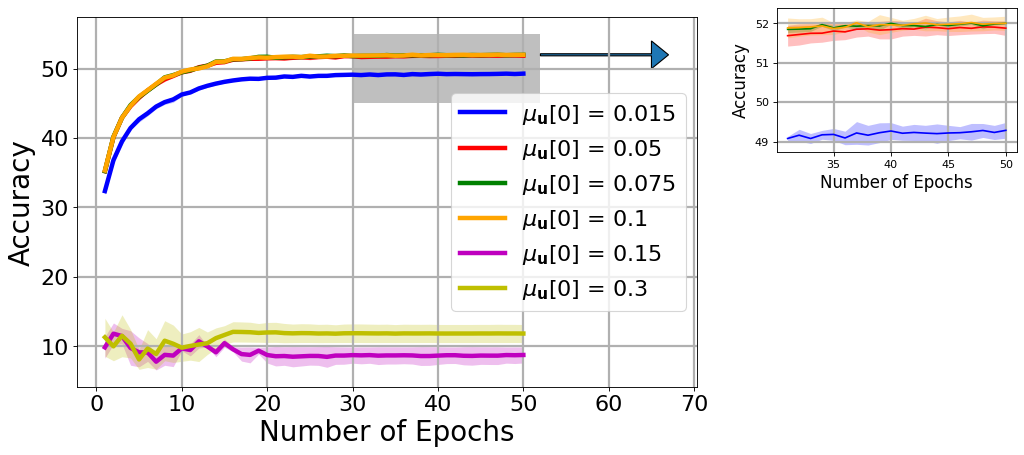

In [56]:
# fh2=plt.subplots(figsize=(10, 6), dpi=80)
# for ii in range( df_setting.shape[0]):
#     data = df_setting.iloc[ii]['Tst_ACC_list']*100
#     std_data = df_setting.iloc[ii]['Tst_STD_list']*100
#     x = np.arange(1, data.shape[0]+1)
#     plt.plot(x, data, linewidth=4, color = global_color_vector[ii], label = r"$\mu_{\mathbf{u}}[0]$ = " + str(df_setting.iloc[ii]["neural_lr_start"]))
#     plt.fill_between(x, data + std_data, data - std_data, alpha=0.25, linewidth=0, color = global_color_vector[ii])
# SetPlotRC()
# gh=plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('Accuracy',fontsize=25)
# plt.xlabel(r"Number of Epochs",fontsize=25)
# plt.legend(fontsize = 20, loc = "best")
# someX, someY = 30, 45
# currentAxis = plt.gca()
# currentAxis.add_patch(Rectangle((someX, someY), 22, 10, facecolor="grey", alpha = .5))
# plt.arrow(52, 52, 15, -0.005, width = 0.3, length_includes_head=True,
#           head_width=4, head_length=2)


# sub_axes = plt.axes([1.0, 0.6, .3, .3])
# for ii in range(df_setting.shape[0]-2):
#     data = df_setting.iloc[ii]['Tst_ACC_list'][30:]*100
#     std_data = df_setting.iloc[ii]['Tst_STD_list'][30:]*100
#     x = np.arange(31, data.shape[0]+31)
#     # location for the zoomed portion  

#     # plot the zoomed portion
#     sub_axes.plot(x, data, color = global_color_vector[ii], label = r"$\mu_{\mathbf{u}}[0]$ = " + str(df_setting.iloc[ii]["neural_lr_start"])) 
#     sub_axes.fill_between(x, data + std_data, data - std_data, alpha=0.25, linewidth=0, color = global_color_vector[ii])
# plt.ylabel('Accuracy',fontsize=15)
# plt.xlabel(r"Number of Epochs",fontsize=15)
# SetPlotRC()
# gh=plt.grid(linewidth=2)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)

(array([48., 49., 50., 51., 52., 53.]),
 [Text(0, 48.0, '48'),
  Text(0, 49.0, '49'),
  Text(0, 50.0, '50'),
  Text(0, 51.0, '51'),
  Text(0, 52.0, '52'),
  Text(0, 53.0, '53')])

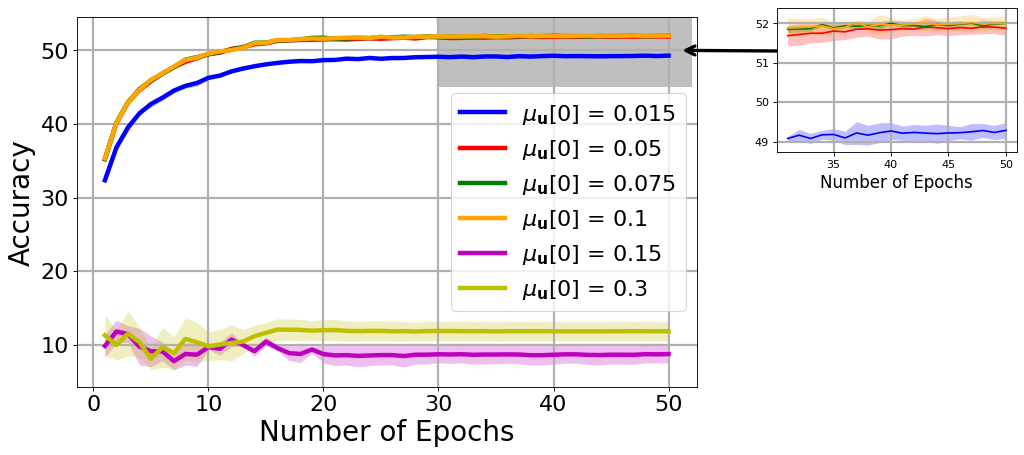

In [57]:
fh2=plt.subplots(figsize=(10, 6), dpi=80)
for ii in range( df_setting.shape[0]):
    data = df_setting.iloc[ii]['Tst_ACC_list']*100
    std_data = df_setting.iloc[ii]['Tst_STD_list']*100
    x = np.arange(1, data.shape[0]+1)
    plt.plot(x, data, color = global_color_vector[ii], linewidth=4, label = r"$\mu_{\mathbf{u}}[0]$ = " + str(df_setting.iloc[ii]["neural_lr_start"]))
    plt.fill_between(x, data + std_data, data - std_data, alpha=0.25, linewidth=0, color = global_color_vector[ii])
SetPlotRC()
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.legend(fontsize = 20, loc = "best")
someX, someY = 30, 45
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((someX, someY), 22, 10, facecolor="grey", alpha = .5))
# Add an arrow pointing to the zoomed-in region
plt.annotate('Zoomed In', xy=(51, 50), xytext=(65, 49), arrowprops=dict(facecolor='black', lw=3, arrowstyle='->'), fontsize=20)

sub_axes = plt.axes([1.0, 0.6, .3, .3])
for ii in range(df_setting.shape[0]-2):
    data = df_setting.iloc[ii]['Tst_ACC_list'][30:]*100
    std_data = df_setting.iloc[ii]['Tst_STD_list'][30:]*100
    x = np.arange(31, data.shape[0]+31)
    # location for the zoomed portion  

    # plot the zoomed portion
    sub_axes.plot(x, data, color = global_color_vector[ii], label = r"$\mu_{\mathbf{u}}[0]$ = " + str(df_setting.iloc[ii]["neural_lr_start"])) 
    sub_axes.fill_between(x, data + std_data, data - std_data, alpha=0.25, linewidth=0, color = global_color_vector[ii])
# plt.ylabel('Accuracy',fontsize=15)
plt.xlabel(r"Number of Epochs",fontsize=15)
SetPlotRC()
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)